# Digit Recognizer
This is a basic computer vision problem where objective is to train neural network model from datasets which consist handwritten numbers. For example image
that contain 28 x 28 pixels, is mapped into 784 components (columns) where every column correspond to one feature and range is into 0-255.
So, the idea is train model from ...

train_data : (made by 42000 rows)
| number | pixel_0 | pixel_1 | .........| pixel_n | where n into [0, 784]

test_data : (made by 28000 rows)
the same, only don't include column label (column to predict)

# CNN Model?

In [140]:
# Importing required libraries
import pandas as pd
import sns as sns
import tensorflow as tf
import tensorflow.keras.layers as tfl
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
# Importing required data
train_data = pd.read_csv('resources/challenge_04/train.csv')
test_data = pd.read_csv('resources/challenge_04/test.csv')

# Preprocessing datasets

In [142]:
# First step is checkout basic dataframe information
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


In [143]:
# Here preprocessing is simple case, because all features belongs to same range, and they have same mean. Number between 0 - 255 when 0 is white and 1 is black (gray scale).

In [144]:
# Basic checkout is find null values.
train_nulls = sum(list(train_data.isna().sum()))
test_nulls = sum(list(test_data.isna().sum()))
print("%s null values into train data" % train_nulls)
print("%s null values into test data" % test_nulls)

0 null values into train data
0 null values into test data


In [145]:
# Surprisingly there are no null values, so we can now extract label column from train data.
y = train_data.label
train_data = train_data.drop("label", axis = 1)

In [146]:
# Here, i don't understand why i need OneHotEncoder?

# Here, is needed to created suitable shape for CNN model.

encoder = OneHotEncoder()
y = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

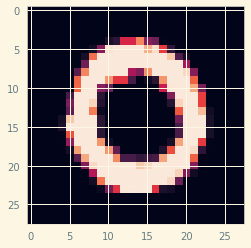

In [147]:
# To use train dataset in correct way we are going to mapping rows from 784 columns to 28x28 matrix.
train_data = train_data.to_numpy().reshape(train_data.shape[0], 28, 28)

# Visualize one row for train_data
plt.imshow(train_data[1])

# Here, this is the step to define model to train and predict label for test data

In [148]:
# 1. Defining Convolutional Neural Network

def cnn_classifier():

    # input layer
    input_data = tf.keras.Input(shape = (28, 28, 1))

    # preprocessing by resizing the image to (32, 32) and using random zoom for data augmentation
    X = tfl.Resizing(32, 32)(input_data)
    X = tfl.RandomZoom(0.2)(X)

    # layer 1
    X = tfl.Conv2D(filters = 6, kernel_size = (5, 5), strides = (1, 1))(X)
    X = tfl.BatchNormalization()(X)
    X = tfl.Activation('relu')(X)

    # layer 2
    X = tfl.AveragePooling2D(strides = 2)(X)

    # layer 3
    X = tfl.Conv2D(16, 5, 1)(X)
    X = tfl.BatchNormalization()(X)
    X = tfl.Activation('relu')(X)

    # layer 4
    X = tfl.AveragePooling2D(strides = 2)(X)

    # layer 5
    X = tfl.Flatten()(X)
    X = tfl.Dense(120, activation = 'relu')(X)

    # layer 6
    X = tfl.Dense(84, activation = 'sigmoid')(X)

    # output layer
    output = tfl.Dense(10, activation = 'softmax')(X)

    model = tf.keras.Model(inputs = input_data, outputs = output)

    return model

In [149]:
# 2. Next step, is compiling model
model = cnn_classifier()
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ["accuracy"]
)

In [150]:
# 3. Next step is fit model to data using next hyperparameters :
epochs = 10 # number of opportunities that every sample have to take part into learning process
model.fit(train_data, y, epochs = epochs, validation_split = 0.10)

Epoch 1/10
1182/1182 [==============================] - 20s 16ms/step - loss: 0.0645 - accuracy: 0.9224 - val_loss: 0.0173 - val_accuracy: 0.9748
Epoch 2/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0143 - accuracy: 0.9795 - val_loss: 0.0091 - val_accuracy: 0.9867
Epoch 3/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0103 - accuracy: 0.9837 - val_loss: 0.0083 - val_accuracy: 0.9881
Epoch 4/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0083 - accuracy: 0.9868 - val_loss: 0.0071 - val_accuracy: 0.9883
Epoch 5/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0069 - accuracy: 0.9892 - val_loss: 0.0070 - val_accuracy: 0.9888
Epoch 6/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0063 - accuracy: 0.9903 - val_loss: 0.0066 - val_accuracy: 0.9898
Epoch 7/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0057 - accuracy: 0.9902 - val_loss: 0.0065 -

In [151]:
# 4. Now, we can extract loss and accuracy values from model for each epoch to check out time evolution.
history = model.history.history

# val_loss : cost function for cross-validation data
# loss : cost function for training data

# loss :
loss_metric = pd.DataFrame({"loss" : history["loss"], "val_loss" : history["val_loss"]})

# accuracy :
accuracy_metric = pd.DataFrame({"accuracy" : history["accuracy"], "val_accuracy" : history["val_accuracy"]})

<AxesSubplot:xlabel='epochs', ylabel='loss'>

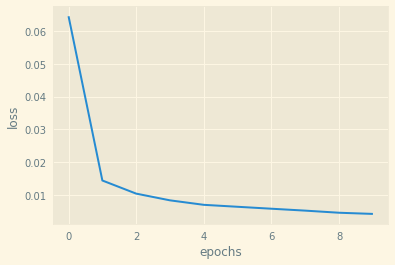

In [152]:
loss_metric = loss_metric.reset_index()
loss_metric.rename(columns={"index" : "epochs"}, inplace=True)

plt.style.use("Solarize_Light2")
sns.lineplot(x="epochs", y="loss", data = loss_metric)

<AxesSubplot:xlabel='epochs', ylabel='accuracy'>

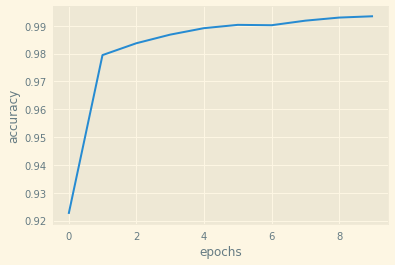

In [153]:
accuracy_metric = accuracy_metric.reset_index()
accuracy_metric.rename(columns={"index" : "epochs"}, inplace=True)

plt.style.use("Solarize_Light2")
sns.lineplot(x="epochs", y="accuracy", data = accuracy_metric)

In [154]:
# 5. Now, we are going to use model to predict over test data and generate submision!
test_data = test_data.to_numpy().reshape(test_data.shape[0], 28, 28)
y_pred = model.predict(test_data)

submission = pd.DataFrame({
    'ImageId' : np.arange(1, y_pred.shape[0]+1),
    'Label' : y_pred.argmax(axis = 1)
})

875/875 [==============================] - 3s 4ms/step


In [155]:
submission.to_csv('submission.csv', index = False)

# Kaggle score!
After upload submission into Kaggle, my accuracy was 0.98960 yaju!!!!!!